In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sbn

In [3]:
#Used to split the data randomly
from sklearn.model_selection import train_test_split

#Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#Saving the content
import joblib
import os

In [5]:
#Reading the training and testing set
churn_train = pd.read_csv('Train_data.csv')
churn_test = pd.read_csv('Test_data.csv')

In [6]:
churn_train.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [10]:
churn_train.loc[0, 'voice mail plan']

' yes'

In [9]:
churn_train.dtypes

state                             object
account length                     int64
area code                          int64
phone number                      object
international plan                object
voice mail plan                   object
number vmail messages              int64
total day minutes                float64
total day calls                    int64
total day charge                 float64
total eve minutes                float64
total eve calls                    int64
total eve charge                 float64
total night minutes              float64
total night calls                  int64
total night charge               float64
total intl minutes               float64
total intl calls                   int64
total intl charge                float64
number customer service calls      int64
Churn                             object
dtype: object

In [7]:
churn_train.shape

(3333, 21)

In [8]:
churn_test.shape

(1667, 21)

In [11]:
churn_train.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls', 'Churn'],
      dtype='object')

## Missing  Value Analysis

In [12]:
missing_value = pd.DataFrame({'Features':churn_train.columns, 'Missing Values Count':churn_train.isna().sum(), 'Missing Values Count Percentage':churn_train.isna().sum()*churn_train.shape[0]/100}, columns=['Features','Missing Values Count', 'Missing Values Count Percentage'])

In [13]:
missing_value = missing_value.sort_values(by='Missing Values Count', ascending=False)

In [14]:
missing_value = missing_value.set_index('Features')

In [15]:
missing_value.head()

,Missing Values Count,Missing Values Count Percentage
Features,,
state,0,0.0
total eve calls,0,0.0
number customer service calls,0,0.0
total intl charge,0,0.0
total intl calls,0,0.0


In [16]:
#Check if any column has any missing values
np.where(missing_value['Missing Values Count'] > 0, "Greater than 0", "Equals 0")

array(['Equals 0', 'Equals 0', 'Equals 0', 'Equals 0', 'Equals 0',
       'Equals 0', 'Equals 0', 'Equals 0', 'Equals 0', 'Equals 0',
       'Equals 0', 'Equals 0', 'Equals 0', 'Equals 0', 'Equals 0',
       'Equals 0', 'Equals 0', 'Equals 0', 'Equals 0', 'Equals 0',
       'Equals 0'], dtype='<U14')

In [17]:
#Check if there are any returning users
#Net Active Users = (New Users + Returning Users - Churn Users)
from collections import Counter
phone_number_count = Counter(churn_train['phone number'])

In [18]:
phone_number_count = dict(phone_number_count)

In [19]:
phone_number_count

{' 382-4657': 1,
 ' 371-7191': 1,
 ' 358-1921': 1,
 ' 375-9999': 1,
 ' 330-6626': 1,
 ' 391-8027': 1,
 ' 355-9993': 1,
 ' 329-9001': 1,
 ' 335-4719': 1,
 ' 330-8173': 1,
 ' 329-6603': 1,
 ' 344-9403': 1,
 ' 363-1107': 1,
 ' 394-8006': 1,
 ' 366-9238': 1,
 ' 351-7269': 1,
 ' 350-8884': 1,
 ' 386-2923': 1,
 ' 356-2992': 1,
 ' 373-2782': 1,
 ' 396-5800': 1,
 ' 393-7984': 1,
 ' 358-1958': 1,
 ' 350-2565': 1,
 ' 343-4696': 1,
 ' 331-3698': 1,
 ' 357-3817': 1,
 ' 418-6412': 1,
 ' 353-2630': 1,
 ' 410-7789': 1,
 ' 416-8428': 1,
 ' 370-3359': 1,
 ' 383-1121': 1,
 ' 360-1596': 1,
 ' 395-2854': 1,
 ' 362-1407': 1,
 ' 341-9764': 1,
 ' 353-3305': 1,
 ' 402-1381': 1,
 ' 332-9891': 1,
 ' 372-9976': 1,
 ' 383-6029': 1,
 ' 353-7289': 1,
 ' 390-7274': 1,
 ' 352-1237': 1,
 ' 353-3061': 1,
 ' 363-5450': 1,
 ' 364-1995': 1,
 ' 398-1294': 1,
 ' 405-7146': 1,
 ' 413-4957': 1,
 ' 420-5645': 1,
 ' 349-4396': 1,
 ' 404-3211': 1,
 ' 353-3759': 1,
 ' 363-5947': 1,
 ' 340-5121': 1,
 ' 370-7574': 1,
 ' 403-9733': 

In [20]:
#True implies no duplicates
len(np.unique(churn_train['phone number'])) == churn_train.loc[:, 'phone number'].shape[0]

True

## Plotting the independent variables

In [21]:
'''
fig, ax = plt.subplots(121)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 16):
    ax = fig.add_subplot(5, 3, plt.hist(churn_train.loc[:1900, list(churn_train.columns)[i+3]]))
    #ax.text(0.5, 0.5, str((5, 3, )),
    #       fontsize=18, ha='center')


    f, ax = plt.figure(figsize=(8,8))
'''

"\nfig, ax = plt.subplots(121)\nfig.subplots_adjust(hspace=0.4, wspace=0.4)\nfor i in range(1, 16):\n    ax = fig.add_subplot(5, 3, plt.hist(churn_train.loc[:1900, list(churn_train.columns)[i+3]]))\n    #ax.text(0.5, 0.5, str((5, 3, )),\n    #       fontsize=18, ha='center')\n\n\n    f, ax = plt.figure(figsize=(8,8))\n"

# Data Preparation

In [21]:
#Remove the trailing dots from the target of training data.
churn_train['Churn'] = list(map(lambda x: x.strip('.'), churn_train['Churn']))

In [22]:
#Remove the leading space from each row of the variable 'Churn' of test data set
churn_train['Churn'] = list(map(lambda x:x.lstrip(' '), churn_train['Churn']))

In [23]:
len(churn_train['Churn'][0])

5

In [24]:
#Remove the trailing dots from the target of testing data.
churn_test['Churn'] = list(map(lambda x: x.strip('.'), churn_test['Churn']))

In [25]:
churn_test['Churn'][0]

' False'

In [26]:
#Remove the leading space from each row of the variable 'Churn' of Test data set
churn_test['Churn'] = list(map(lambda x: x.lstrip(' '), churn_test['Churn']))

In [28]:
#Convert the target to a categorical variable
#Categorical Variables -- international plan 	voice mail plan

def to_numerical(col):
    if(col=='Churn'):
        bool_to_int = {'False':0, 'True':1}
    else:
        bool_to_int = {' yes':1, ' no':0}
    
    churn_train[col] = churn_train[col].map(bool_to_int)
    churn_test[col] = churn_test[col].map(bool_to_int)

In [29]:
categorical_variables = ['international plan','voice mail plan','Churn']

In [30]:

l = list(map(to_numerical, categorical_variables))

In [31]:
#Check the Training Data
churn_train[categorical_variables]

,international plan,voice mail plan,Churn
0,0,1,0
1,0,1,0
2,0,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,0,1,0
7,1,0,0
8,0,0,0
9,1,1,0


In [32]:
#Check the Testing Data
churn_test[categorical_variables]

,international plan,voice mail plan,Churn
0,0,0,0
1,0,0,0
2,0,1,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,1,0
7,0,0,0
8,0,0,0
9,0,1,0


In [33]:
#Divide the data into two categories --- Churned employees and not Churned employees
churned_emp = churn_train.loc[churn_train['Churn']==1, :]
not_churned_emp = churn_train.loc[churn_train['Churn']==0, :]

In [34]:
#Save the churned and non churned employees to a file
churned_emp.to_csv("Churned Employees.csv")
not_churned_emp.to_csv("Not Churned Employees.csv")

In [35]:
churn_train['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

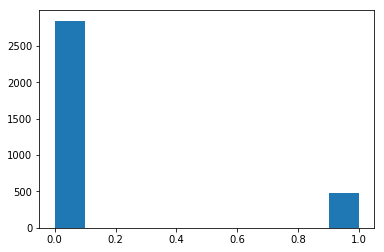

In [36]:
plt.hist(churn_train['Churn'])
plt.savefig("Class Distribution.png")

## Churned Employees

In [37]:
churned_emp.shape

(483, 21)

In [38]:

#Find the correlation between the numeric variables
def correlation(data, label):
    #Correlation
    numeric_variables = list(set(churned_emp.columns) - set(categorical_variables))

    f, ax = plt.subplots(figsize=(7,5))
    data_corr = data[numeric_variables].corr()
    
    sbn.heatmap(data_corr,
                mask = np.zeros_like(data_corr, dtype=np.bool),
                cmap = sbn.diverging_palette(220, 20, as_cmap=True),
                
                square = True,
                ax = ax)
    plt.savefig("Correlation Analysis " + label + ".png")

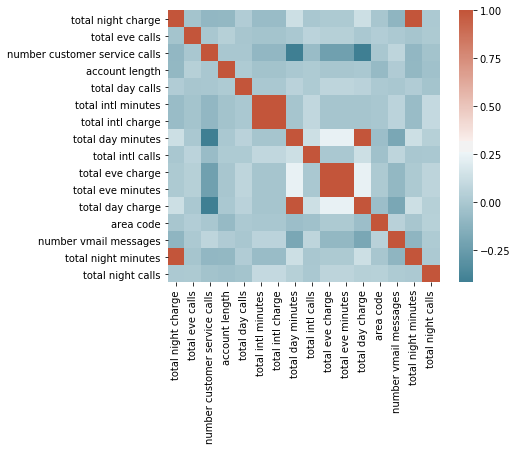

In [39]:
correlation(churned_emp, "Churned Employees")

In [40]:
churn_train.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls', 'Churn'],
      dtype='object')

In [41]:
class Correlation():
    def __init__(self, data):
        self.data = data
        
    def get_karl_pearsons_corr(self, t):
        #Receive parameters as a tuple
    
        A = np.array(self.data[t[0]])
        B = np.array(self.data[t[1]])
    
        #A and B are numpy arrays
        mean_A, mean_B = np.mean(A), np.mean(B)
    
        numerator = np.sum([(x-mean_A)*(y-mean_B) for x,y in zip(A,B)])
    
        SD_A = np.sqrt(np.sum([(x-mean_A)**2 for x in A]))
        SD_B = np.sqrt(np.sum([(y-mean_B)**2 for y in B]))
    
        denominator = SD_A*SD_B
    
        return (numerator/denominator)
    

In [42]:
#Relationship between minutes and the charge
churn_emp_corr = Correlation(churned_emp)
t_minutes_charge = [('total day minutes', 'total day charge'), ('total eve minutes', 'total eve charge'), ('total night minutes', 'total night charge')]
print("{}" .format(list(map(churn_emp_corr.get_karl_pearsons_corr, t_minutes_charge))))

#Total Minutes is Strongly Positively correlated to Total Charge for Day, Evening and Nights

[0.9999999705586659, 0.9999997793340166, 0.999999024393954]


In [43]:
#Relationship between calls and the charge
t_calls_charge = [('total day calls', 'total day charge'),('total eve calls', 'total eve charge'), ('total night calls', 'total night charge')]
print("{}" .format(list(map(churn_emp_corr.get_karl_pearsons_corr, t_calls_charge))))

[0.06178840055724186, 0.04294124359976073, 0.0027697080633324353]


## Non Churned Employees

In [44]:
not_churned_emp.shape

(2850, 21)

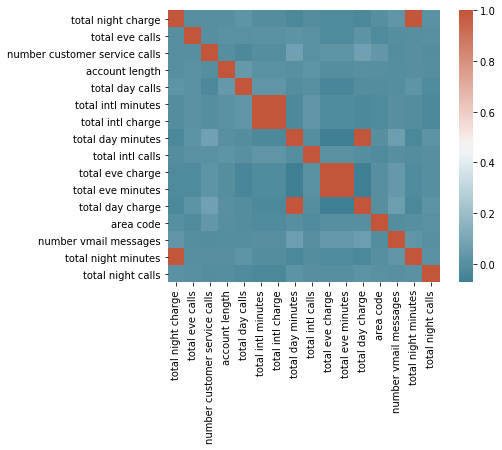

In [45]:
correlation(not_churned_emp, "Retained Employees")

In [46]:
#Relationship between minutes and the charge
not_churn_emp_corr = Correlation(not_churned_emp)
t_minutes_charge = [('total day minutes', 'total day charge'), ('total eve minutes', 'total eve charge'), ('total night minutes', 'total night charge')]
print("{}" .format(list(map(not_churn_emp_corr.get_karl_pearsons_corr, t_minutes_charge))))

#Total Minutes is Strongly Positively correlated to Total Charge for Day, Evening and Nights

[0.9999999435623866, 0.9999997733867907, 0.9999992412193637]


In [47]:
#Relationship between calls and the charge
t_calls_charge = [('total day calls', 'total day charge'),('total eve calls', 'total eve charge'), ('total night calls', 'total night charge')]
print("{}" .format(list(map(not_churn_emp_corr.get_karl_pearsons_corr, t_calls_charge))))

[-0.011850159757919037, -0.02184027862173301, 0.012294852983875764]


In [48]:
#Selecting the variables having less correlation amongst themselves.
variables = ['total day calls', 'total day charge', 'total eve calls', 'total eve charge', 'total night calls', 'total night charge']

### Area - wise analysis

In [49]:
np.unique(not_churned_emp['area code'])

array([408, 415, 510])

In [50]:
not_churned_emp__408 = not_churned_emp.loc[not_churned_emp['area code'] == 408, :]

In [51]:
not_churned_emp__408.shape

(716, 21)

In [52]:
not_churned_emp_415 = not_churned_emp.loc[not_churned_emp['area code'] == 415, :]

In [53]:
not_churned_emp_415.shape

(1419, 21)

In [54]:
not_churned_emp_510 = not_churned_emp.loc[not_churned_emp['area code'] == 510, :]

In [55]:
not_churned_emp_510.shape

(715, 21)

## Outlier Analysis

In [56]:
'''
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')
'''

"\nfor i in range(1, 7):\n    plt.subplot(2, 3, i)\n    plt.text(0.5, 0.5, str((2, 3, i)),\n             fontsize=18, ha='center')\n"

In [56]:
def plotting(variable):
    f, ax = plt.subplots(figsize=(6,6))
    plt.boxplot(churn_train[variable])
    plt.savefig(os.getcwd() + "/Plots/" + variable + ".png")

In [57]:
def outlier_analysis(variable):
    #Plotting the variable
    plotting(variable)
    
    #Set the lower and upper quartile
    data = []
    data = input().split(' ')
    lower, upper = np.percentile(churn_train[variable], [int(data[0]), int(data[1])])
    
    #IQR
    IQR = (upper-lower)
    
    lower_outliers = churn_train.loc[churn_train[variable]<(lower - 1.5*IQR), variable]
    upper_outliers = churn_train.loc[churn_train[variable]>(upper + 1.5*IQR), variable]
    
    #Capping the outlier
    churn_train.loc[churn_train[variable]>(upper + 1.5*IQR), variable] = (upper + 1.5*IQR)
    churn_train.loc[churn_train[variable]<(lower - 1.5*IQR), variable] = (lower - 1.5*IQR)
    
    print("Lower:- {}\nUpper:- {}" .format(lower_outliers, upper_outliers))

25 75
Lower:- 692     36
740     40
1144    30
1322    42
1345     0
1346    45
1397     0
1422    45
1989    35
2217    42
2492    45
2884    44
2885    44
2964    44
3187    40
Name: total day calls, dtype: int64
Upper:- 315     158
468     163
1057    158
1121    165
1460    160
1869    156
2392    158
2394    157
Name: total day calls, dtype: int64
25 75
Lower:- 685     5.25
741     5.78
1052    2.13
1076    4.40
1345    0.00
1397    0.00
1621    3.32
1986    1.34
2124    4.59
2252    2.99
2736    0.44
2753    1.33
3046    3.21
3174    5.08
Name: total day charge, dtype: float64
Upper:- 15      56.59
156     57.36
197     55.51
365     59.64
605     57.04
975     56.83
985     58.96
1679    56.07
2028    55.78
2412    55.47
2594    58.70
Name: total day charge, dtype: float64
25 75
Lower:- 154     46
475     42
646     37
960     12
1266    45
1615    36
1730    46
1856    44
2592    46
2853    43
2932     0
Name: total eve calls, dtype: int64
Upper:- 58      164
301     168
1020  

[None, None, None, None, None, None]

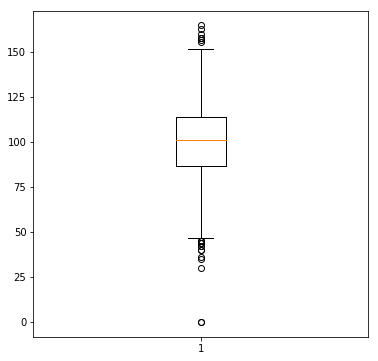

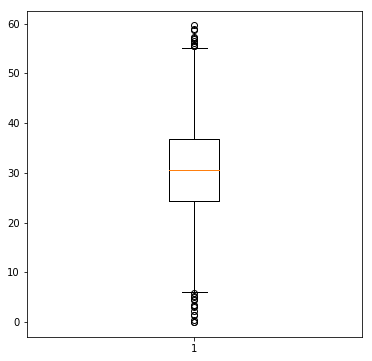

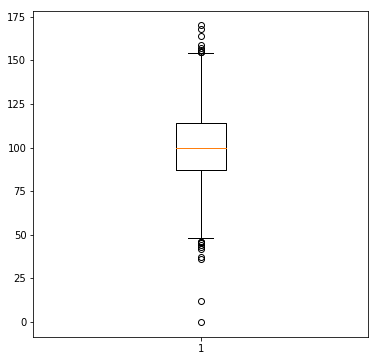

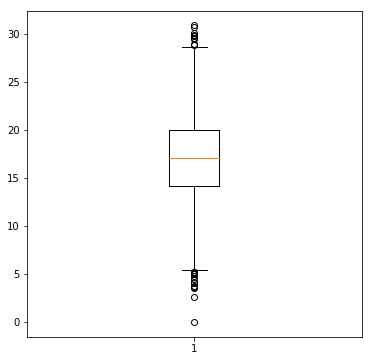

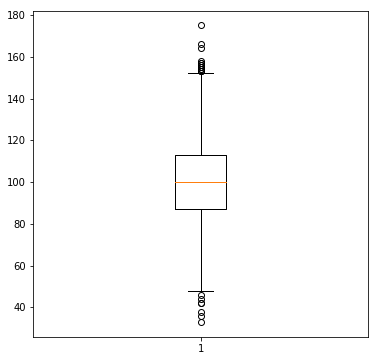

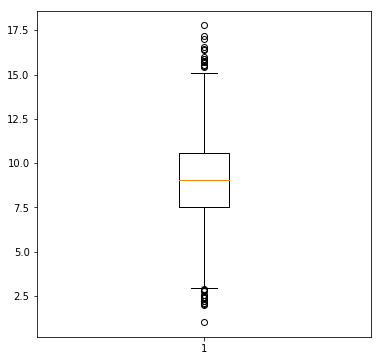

In [58]:
#
list(map(outlier_analysis, variables))

In [59]:
variables

['total day calls',
 'total day charge',
 'total eve calls',
 'total eve charge',
 'total night calls',
 'total night charge']

In [60]:
#Saving the outlier free data to a file
churn_train.to_csv("outlier_free_churn_train.csv")

In [61]:
#View the head of the new data frame
outlier_free_churn_train = pd.read_csv("outlier_free_churn_train.csv")

## Normality Check

In [62]:
from statsmodels.graphics.gofplots import  qqplot

## Dealing With Class Imbalance

In [63]:
#Systematic Sampling
N = 2850 #Number of observations present in the majority class 
k = 483 #Number of observations present in the minority class


In [64]:
if(N%k>=(k//2)):
    n = np.ceil(N/k) #Number of samples
    print(n)
else:
    n = np.floor(N/K)
    print(n)

6.0


In [66]:
#Consider every 6th observation of the majority class --- Not Churned
#not_churned_emp.iloc[i,:]
ind = [i for i in range(len(not_churned_emp)) if(i%6==0)]

In [67]:
not_churned_emp_sampled = not_churned_emp.iloc[ind, :]

In [68]:
ind

[0,
 6,
 12,
 18,
 24,
 30,
 36,
 42,
 48,
 54,
 60,
 66,
 72,
 78,
 84,
 90,
 96,
 102,
 108,
 114,
 120,
 126,
 132,
 138,
 144,
 150,
 156,
 162,
 168,
 174,
 180,
 186,
 192,
 198,
 204,
 210,
 216,
 222,
 228,
 234,
 240,
 246,
 252,
 258,
 264,
 270,
 276,
 282,
 288,
 294,
 300,
 306,
 312,
 318,
 324,
 330,
 336,
 342,
 348,
 354,
 360,
 366,
 372,
 378,
 384,
 390,
 396,
 402,
 408,
 414,
 420,
 426,
 432,
 438,
 444,
 450,
 456,
 462,
 468,
 474,
 480,
 486,
 492,
 498,
 504,
 510,
 516,
 522,
 528,
 534,
 540,
 546,
 552,
 558,
 564,
 570,
 576,
 582,
 588,
 594,
 600,
 606,
 612,
 618,
 624,
 630,
 636,
 642,
 648,
 654,
 660,
 666,
 672,
 678,
 684,
 690,
 696,
 702,
 708,
 714,
 720,
 726,
 732,
 738,
 744,
 750,
 756,
 762,
 768,
 774,
 780,
 786,
 792,
 798,
 804,
 810,
 816,
 822,
 828,
 834,
 840,
 846,
 852,
 858,
 864,
 870,
 876,
 882,
 888,
 894,
 900,
 906,
 912,
 918,
 924,
 930,
 936,
 942,
 948,
 954,
 960,
 966,
 972,
 978,
 984,
 990,
 996,
 1002,
 1008,
 10

In [69]:
not_churned_emp_sampled.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
6,MA,121,510,355-9993,0,1,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
13,MT,95,510,394-8006,0,0,0,156.6,88,26.62,...,75,21.05,192.3,115,8.65,12.3,5,3.32,3,0
20,FL,147,415,396-5800,0,0,0,155.1,117,26.37,...,93,20.37,208.8,133,9.40,10.6,4,2.86,0,0
27,MT,54,408,418-6412,0,0,0,134.3,73,22.83,...,100,13.22,102.1,68,4.59,14.7,4,3.97,3,0


In [70]:
not_churned_emp_sampled.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
3298,MD,83,510,340-9013,0,0,0,78.1,70,13.28,...,115,20.34,144.4,112,6.50,12.3,4,3.32,1,0
3306,AL,106,408,404-5283,0,1,29,83.6,131,14.21,...,131,17.33,229.5,73,10.33,8.1,3,2.19,1,0
3312,SC,181,408,406-6304,0,0,0,229.9,130,39.08,...,93,12.27,262.4,110,11.81,14.2,4,3.83,2,0
3318,OK,52,415,397-9928,0,0,0,124.9,131,21.23,...,118,25.54,192.5,106,8.66,11.6,4,3.13,2,0
3327,SC,79,415,348-3830,0,0,0,134.7,98,22.90,...,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0


In [71]:
not_churned_emp_sampled.shape

(475, 21)

In [72]:
#Combine the data sets not_churned_emp_sampled and churned_emp
churn_combine = pd.concat([not_churned_emp_sampled, churned_emp])
churn_combine.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
6,MA,121,510,355-9993,0,1,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
13,MT,95,510,394-8006,0,0,0,156.6,88,26.62,...,75,21.05,192.3,115,8.65,12.3,5,3.32,3,0
20,FL,147,415,396-5800,0,0,0,155.1,117,26.37,...,93,20.37,208.8,133,9.40,10.6,4,2.86,0,0
27,MT,54,408,418-6412,0,0,0,134.3,73,22.83,...,100,13.22,102.1,68,4.59,14.7,4,3.97,3,0


In [73]:
#Reset the index
churn_combine = churn_combine.reset_index()

In [74]:
churn_combine = churn_combine.drop('index', axis=1)

In [75]:
churn_combine.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,MA,121,510,355-9993,0,1,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
2,MT,95,510,394-8006,0,0,0,156.6,88,26.62,...,75,21.05,192.3,115,8.65,12.3,5,3.32,3,0
3,FL,147,415,396-5800,0,0,0,155.1,117,26.37,...,93,20.37,208.8,133,9.40,10.6,4,2.86,0,0
4,MT,54,408,418-6412,0,0,0,134.3,73,22.83,...,100,13.22,102.1,68,4.59,14.7,4,3.97,3,0


In [76]:
churn_combine.shape

(958, 21)

In [77]:
churn_combine['Churn'].value_counts()

1    483
0    475
Name: Churn, dtype: int64

## Chi - Squared Test

In [78]:
#In order to find the relationship between two categorical variables we use Chi Squared test
from scipy.stats import chi2_contingency

In [79]:
categorical_variables

['international plan', 'voice mail plan', 'Churn']

In [80]:

for cat in categorical_variables[:-1]:
    print(cat)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(churn_combine['Churn'], churn_combine[cat]))
    print("{}\t{}\t{}\t{}\n" .format(chi2, p, dof, ex))

international plan
79.36175846925053	5.171752458070126e-19	1	[[392.19728601  82.80271399]
 [398.80271399  84.19728601]]

voice mail plan
23.839191401523237	1.0472828255561457e-06	1	[[364.43110647 110.56889353]
 [370.56889353 112.43110647]]



In [81]:
'''
0 --- Not Churned
1 --- Churned
'''

'\n0 --- Not Churned\n1 --- Churned\n'

/home/shrikrishna/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


'\n/home/shrikrishna/Desktop/Edwisor/New Version/Project/Employee Churn Prediction\n'

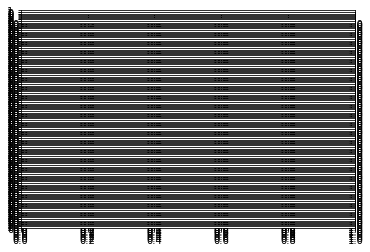

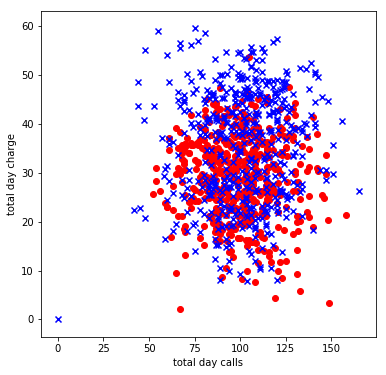

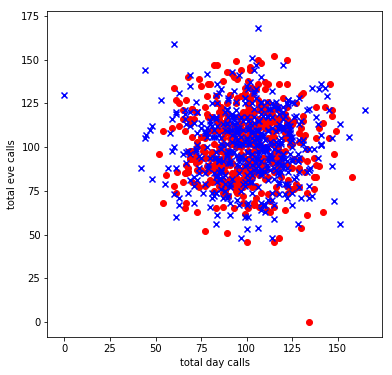

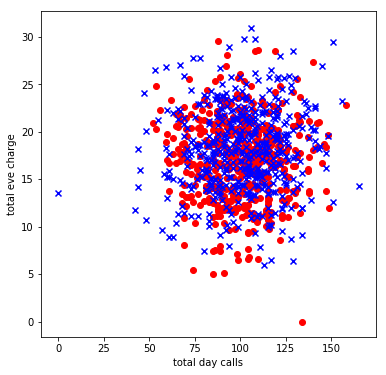

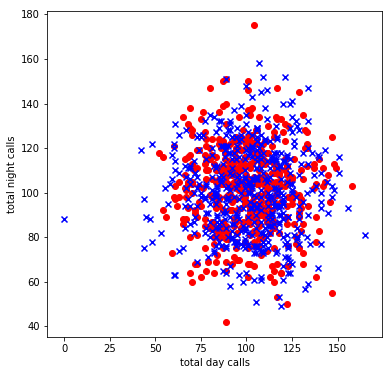

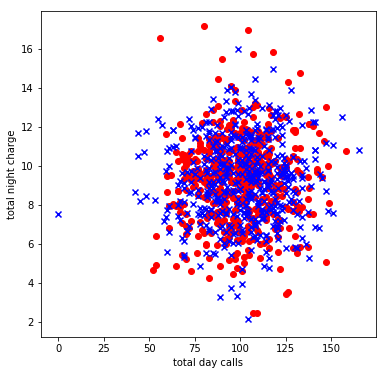

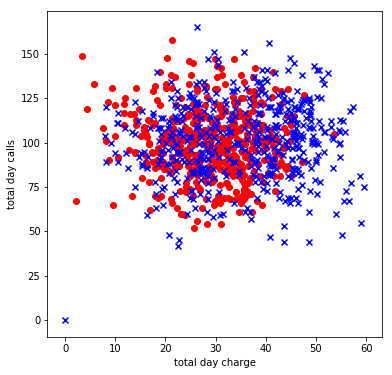

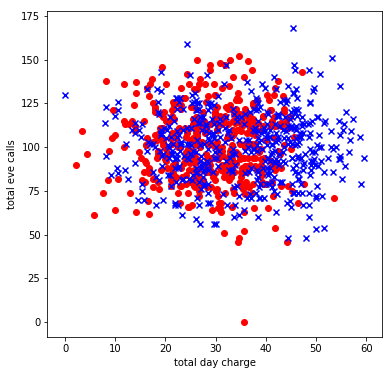

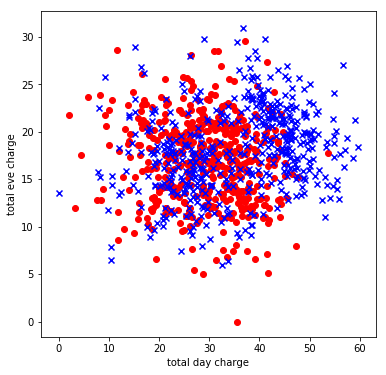

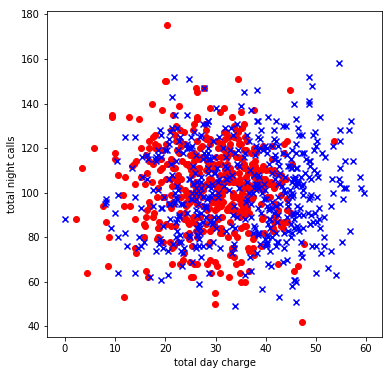

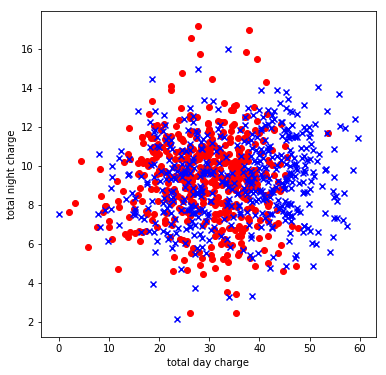

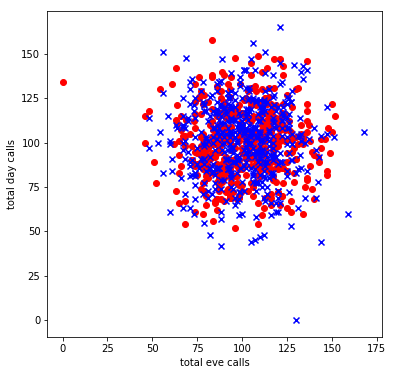

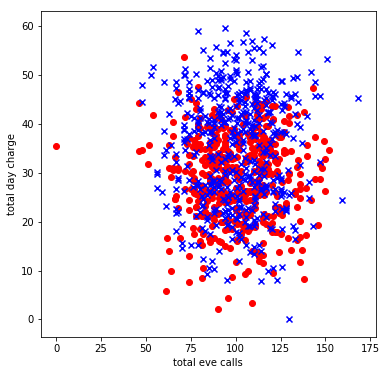

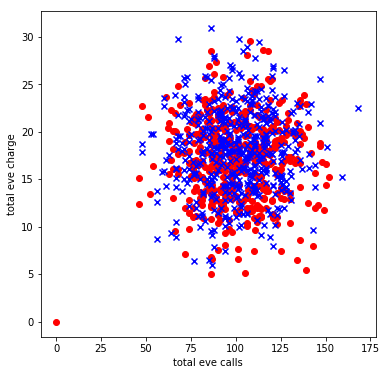

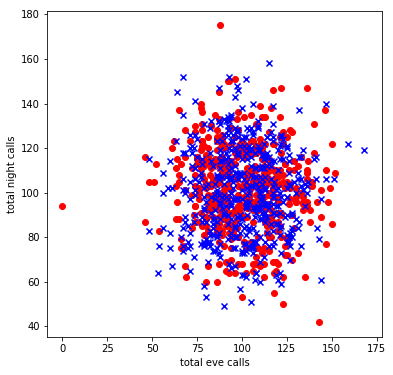

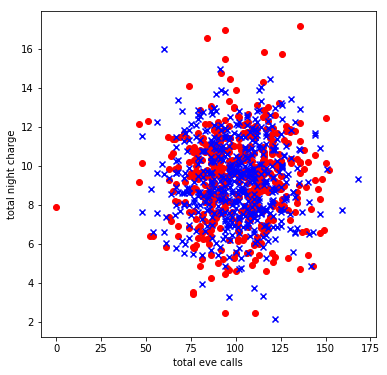

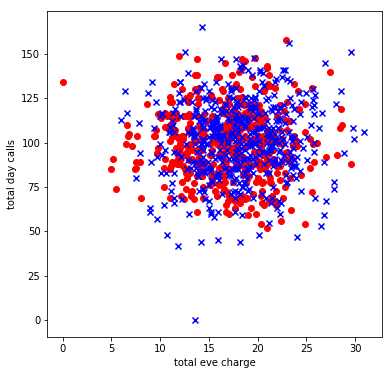

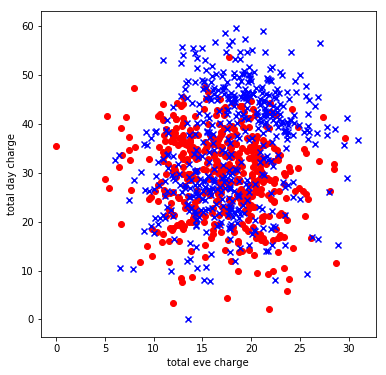

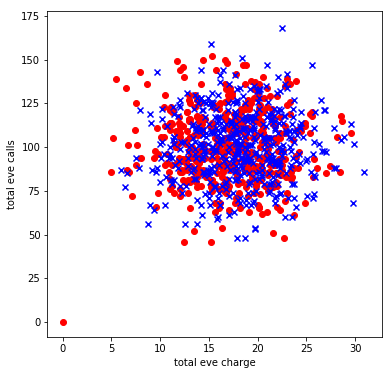

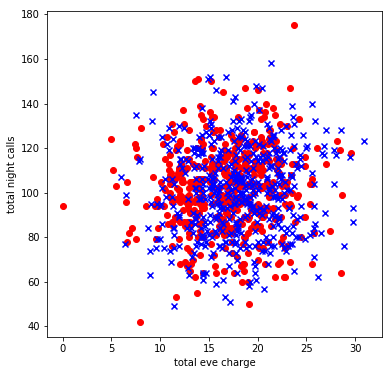

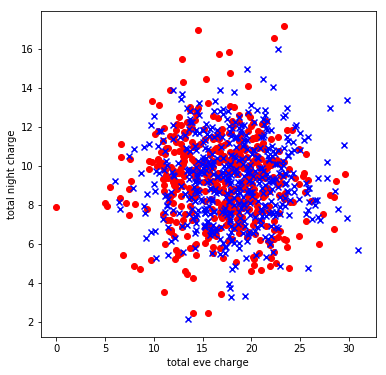

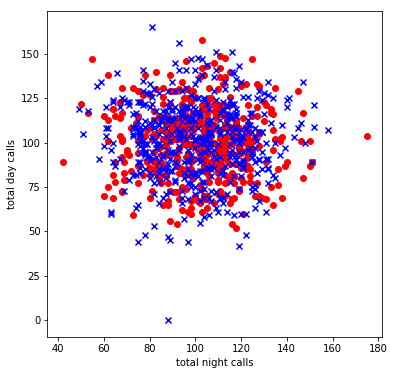

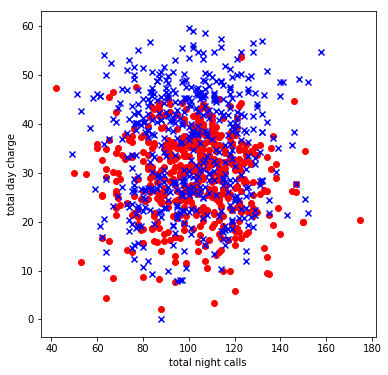

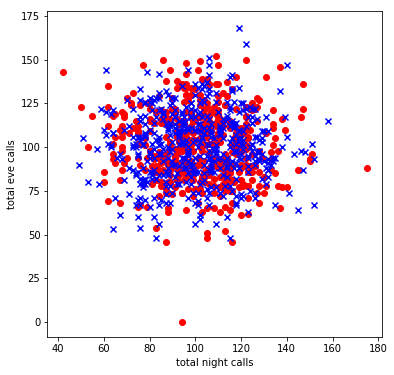

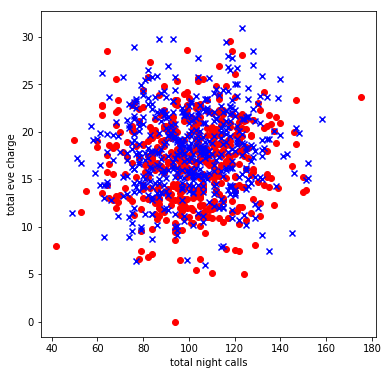

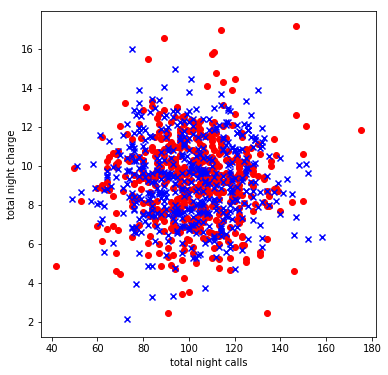

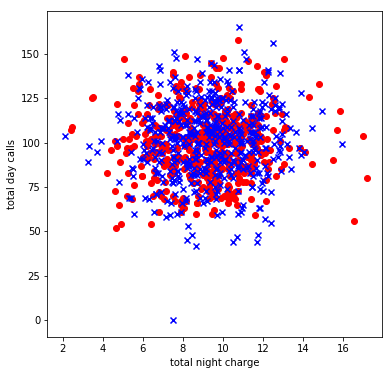

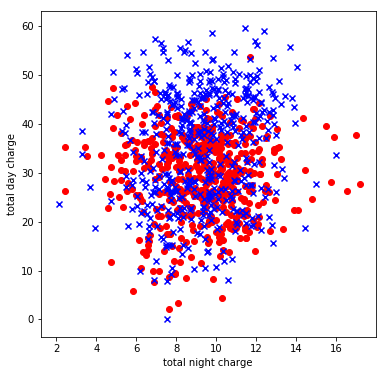

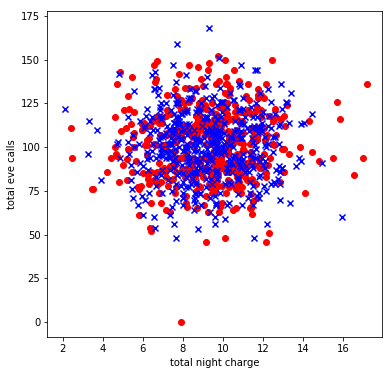

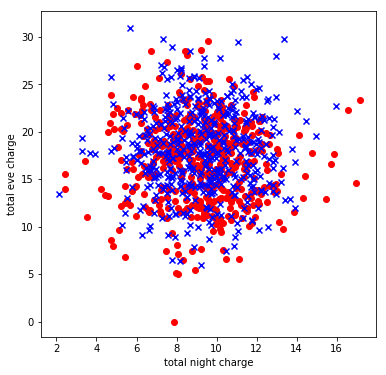

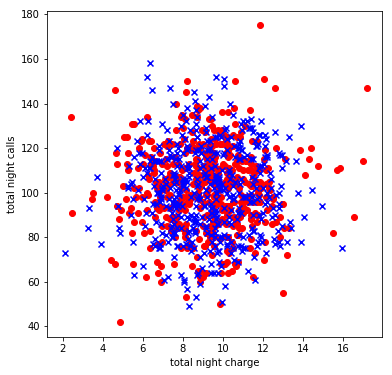

In [82]:
#Plotting
def view_plot(col_1, col_2):
    f, ax = plt.subplots(figsize=(6,6))
    plt.scatter(churn_combine.loc[:475, col_1], churn_combine.loc[:475, col_2], color = 'red', marker='o', label=1)
    plt.scatter(churn_combine.loc[476:476+475, col_1], churn_combine.loc[476:476+475, col_2], color = 'blue', marker='x', label=0)
    plt.savefig(os.getcwd() + "/Plots/" + col_1 + " VS " + col_2 + ".png")
    plt.xlabel(col_1)
    plt.ylabel(col_2)

#variables = ['total day calls', 'total day charge', 'total eve calls', 'total eve charge', 'total night calls', 'total night charge']    

f, ax = plt.subplots(121)
for col_1 in variables:
    for col_2 in variables:
        if(col_1==col_2):
            continue
        view_plot(col_1, col_2)
'''
/home/shrikrishna/Desktop/Edwisor/New Version/Project/Employee Churn Prediction
'''

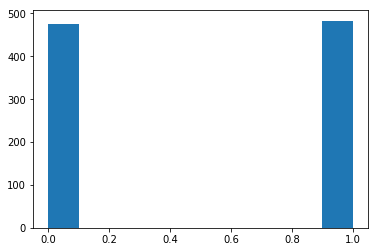

In [83]:
plt.hist(churn_combine['Churn'])
plt.savefig("Balanced Class After Down Sampling")

## Multiple Algorithms

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, f1_score
    

In [97]:
class modeling():
    
    def __init__(self, X_train, X_test, y_train, y_test, model, name_of_classifier):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.model = model
        self.clf_name = name_of_classifier
    
    def auc_roc(self):
        predicted_probability = self.model.predict_proba(self.X_test)
            
        fpr, tpr, _ = roc_curve(self.y_test,  predicted_probability[::,1])
        auc = roc_auc_score(self.y_test, predicted_probability[::,1])
        plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
        plt.legend(loc=4)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.savefig("AUC " + self.clf_name + ".png")
        plt.show()
    
    def evaluate(self, CM):
        accuracy = CM.diagonal().sum()/CM.sum()
        precision = CM[0][0]/(CM[0][0] + CM[0][1])
        recall = CM[0][0]/(CM[0][0] + CM[1][0])
        f_measure = (2*precision*recall)/(precision+recall)
        print(CM)
        print("Accuracy:- {}\nPrecision:- {}\nRecall:- {}\nF-measure:- {}" .format(accuracy,precision, recall, f_measure))
        
    def prediction(self, f=1):
        #X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=test_size/100, random_state=42)
        
        #Fit the model
        model = self.model.fit(self.X_train, self.y_train)
        
        #Predict on test set
        predicted_test = model.predict(self.X_test)
        
        #Results
        result_test = pd.DataFrame({'Actual':self.y_test.ravel(), 'Predicted':predicted_test.ravel()}, columns=['Actual','Predicted'])
        result_test.head()
        
        #Save the model
        joblib.dump(model, os.getcwd() + "/Models/" + self.clf_name + ".pkl")
        
        #Print the AUC_ROC curve
        self.auc_roc()
        
        #Evaluate the model
        CM = confusion_matrix(self.y_test.ravel(), predicted_test.ravel(), labels=None, sample_weight=None)
        self.evaluate(CM)
        #F1 Score
        #print(f1_score(y_test.ravel(), predicted_test.ravel()))

In [85]:
variables = ['total day calls', 'total day charge', 'total eve calls', 'total eve charge', 'total night calls', 'total night charge']

In [86]:
#Creating Dependent and Independent Variables
#Training and Testing Data
X_train = churn_combine[variables]
y_train = churn_combine['Churn']
X_test = churn_test[variables]
y_test = churn_test['Churn']

## Calculate The False Negative Rate

In [17]:
def calculate_FNR(FN, TP):
    FNR = FN/(TP+FN)
    
    return (FNR)

## Calculate The Churn Rate

In [118]:
#no. customers predicted to be churned out/total no. customers
def churn_rate(TP, TN, FP, FN):
    
    return (TP/(TP+TN+FP+FN))

## Logistic Regression

### Assumptions of Logistic Regression

#### The independent variables must not be correlated 
#### The independent variables are linearly related to the log odds
#### Include meaningful variables
#### The dependent variables should be binary
#### Sample size must be large -- (2850 + 483 = 3333)


In [88]:
#Calculate the log odds of the target variable
#log(P/(1-P))
#P -- Probability of Churn
#1-P -- Probility of no Churn
P = len(churn_combine.loc[churn_combine['Churn']==1, 'Churn'])/len(churn_combine.loc[churn_combine['Churn']])
print("%.5f\t%.5f\n" %(P,(1-P)))
#Corrleation between Log Odds and Independent Variables
np.log(P/(1-P))



0.50418	0.49582



0.016701849617931353

In [89]:
from sklearn.linear_model import LogisticRegression as LoR

In [98]:
lor = LoR()

In [99]:
logistic_model = modeling(X_train, X_test, y_train, y_test, lor, "Logistic Regression")

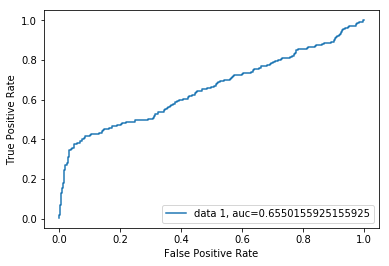

[[825 618]
 [ 86 138]]
Accuracy:- 0.5776844631073785
Precision:- 0.5717255717255717
Recall:- 0.9055982436882547
F-measure:- 0.7009345794392524


In [100]:
logistic_model.prediction()

In [136]:
churn_rate(825, 138, 618, 86)

0.4949010197960408

In [16]:
print("%.5f" %(calculate_FNR(86, 825)))

0.09440


## Logistic Classifier Predicted Churn Rate = 0.4949010197960408

In [ ]:
def auc_roc(model, name_of_classifier):
    predicted_probability = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test,  predicted_probability[::,1])
    auc = roc_auc_score(y_test, predicted_probability[::,1])
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.savefig("AUC " + name_of_classifier + ".png")
    plt.show()

## Perceptron Model For Prediction

In [101]:
from sklearn.linear_model import Perceptron

In [102]:
per = Perceptron(n_iter=40, eta0=0.01, random_state=1)

In [103]:
perceptron_model = modeling(X_train, X_test, y_train, y_test, per, "Perceptron Model")

In [139]:
#Results for various splits [(80,20), (70,30), (50,50)]
#perceptron_model.prediction(1)

In [138]:
#evaluate(CM_perceptron)

In [137]:
#CM_perceptron

## Naive Bayes Classifier

In [108]:
from sklearn import naive_bayes

In [109]:
clf_NB = naive_bayes.BernoulliNB()


In [110]:
naive_bayes_model = modeling(X_train, X_test, y_train, y_test, clf_NB, "Naive Bayes Model")

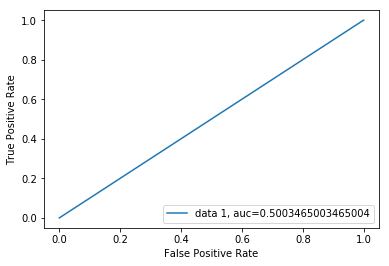

[[   1 1442]
 [   0  224]]
Accuracy:- 0.1349730053989202
Precision:- 0.000693000693000693
Recall:- 1.0
F-measure:- 0.0013850415512465376


In [111]:
#Results for various splits [(80,20), (70,30), (50,50)]
naive_bayes_model.prediction()

In [135]:
churn_rate(1,224,1442,0)

0.0005998800239952009

In [15]:
print("%.5f" %(calculate_FNR(0, 1))) 
#0 value suggests 100% Recall

0.00000


## Naive Bayes Classifier Predicted Churn Rate = 0.0005998800239952009

## SVM Classifier

In [114]:
from sklearn.svm import SVC

In [ ]:
help(SVC)

### RBF Kernel

In [115]:
#Using the default RBF kernel
svc = SVC(probability=True)

In [116]:
svc_model = modeling(X_train, X_test, y_train, y_test, svc, "Support Vector Machine Model")

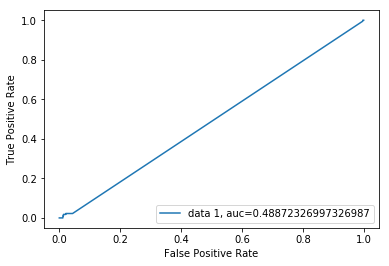

[[  44 1399]
 [   5  219]]
Accuracy:- 0.15776844631073786
Precision:- 0.030492030492030493
Recall:- 0.8979591836734694
F-measure:- 0.058981233243967826


In [117]:
svc_model.prediction()

In [119]:
churn_rate(44, 219, 1399, 5)

0.026394721055788842

In [11]:
print("%.5f" %(calculate_FNR(5, 44)))

0.10204


## SVC Predicted Churn Rate = 0.026394721055788842

### Polynomial Kernel

In [ ]:
#Using the Polynomial kernel
#svc_poly = SVC(probability=True, kernel='poly')

In [ ]:
#svc_poly_model = modeling(X_train, X_test, y_train, y_test, svc_poly, "Support Vector Machine  Ploynomial Kernel Model")

In [ ]:
#svc_poly_model.prediction()

In [ ]:
#list(np.array(y_test))

In [ ]:
#result_df = pd.DataFrame({'Actual':list(np.array(y_test)), 'Predicted':predicted}, columns=['Actual', 'Predicted'])

#result_df.head()

In [ ]:
#CM_SVM_poly = confusion_matrix(list(np.array(y_test)), predicted) 

In [ ]:
#CM_SVM_poly

In [ ]:
#evaluate(CM_SVM_poly)

### ROC_AUC Curve

In [ ]:
help(roc_auc_score)

In [ ]:
probability_estimates_of_the_positive_class

## Random Forest Classifier

In [120]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [121]:
help(RFC)

Help on class RandomForestClassifier in module sklearn.ensemble.forest:

class RandomForestClassifier(ForestClassifier)
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and use averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : integer, optional (default=10)
 |      The number of trees in the forest.
 |  
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |      Note: this parameter is tree-specific.
 |  
 |  max_features : int, fl

### Random Forest with 10 Trees

In [122]:
#Number of trees = 20 (default=10)
#Criterion = gini (default)
#max_depth = default=None
#
rfc = RFC(n_estimators=10)

In [123]:
random_forest_model = modeling(X_train, X_test, y_train, y_test, rfc, "Random Forest Model 10 Trees")

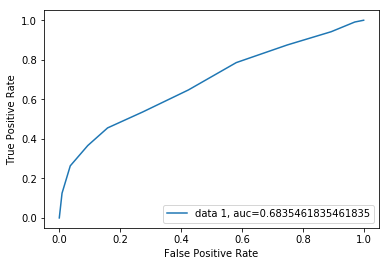

[[1048  395]
 [ 104  120]]
Accuracy:- 0.7006598680263947
Precision:- 0.7262647262647263
Recall:- 0.9097222222222222
F-measure:- 0.8077071290944123


In [124]:
#Results for various splits [(80,20), (70,30), (50,50)]
random_forest_model.prediction()

In [126]:
churn_rate(1048, 120, 395, 104)

0.6286742651469706

In [12]:
print("%.5f" %(calculate_FNR(104, 1048)))

0.09028


## Random Forest 10 Trees Predicted Churn Rate = 0.6286742651469706

### Random Forest With 20 Trees

In [127]:
rfc = RFC(n_estimators=20)

In [128]:
random_forest_model = modeling(X_train, X_test, y_train, y_test, rfc, "Random Forest Model 20 Trees")

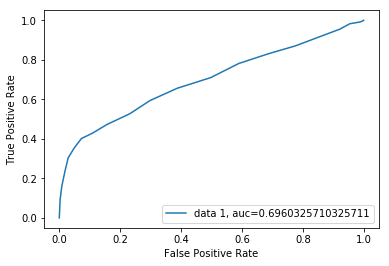

[[1013  430]
 [  91  133]]
Accuracy:- 0.6874625074985004
Precision:- 0.702009702009702
Recall:- 0.917572463768116
F-measure:- 0.795445622300746


In [129]:
random_forest_model.prediction()

In [130]:
churn_rate(1013, 133, 430, 91)

0.6076784643071386

In [13]:
print("%.5f" %(calculate_FNR(91, 1013)))

0.08243


## Random Forest 20 Trees Predicted Churn Rate = 0.6076784643071386

## Random Forest With 80 Trees


In [131]:
rfc = RFC(n_estimators=80)

In [132]:
random_forest_model = modeling(X_train, X_test, y_train, y_test, rfc, "Random Forest Model 80 Trees")

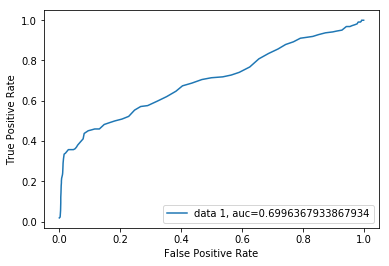

[[1024  419]
 [  95  129]]
Accuracy:- 0.6916616676664668
Precision:- 0.7096327096327096
Recall:- 0.9151027703306523
F-measure:- 0.7993754879000781


In [133]:
random_forest_model.prediction()

In [134]:
churn_rate(1024, 129, 419, 95)

0.6142771445710857

In [14]:
print("%.5f" %(calculate_FNR(95, 1024)))

0.08490


## Random Forest 80 Trees Predicted Churn Rate = 0.6142771445710857